In [1]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
color = sns.color_palette()
sns.set_style('whitegrid')
import gc
import datetime


In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
def basic_info(df, name):
    print(f"\n{name} Dataset:\n")
    print(f"Shape: {df.shape}\n")
    print("Columns:", df.columns.tolist(), "\n")
    print("Info:")
    print(df.info())
    print("\nFirst 5 Rows:\n", df.head())
    print("\nMissing Values:\n", df.isnull().sum())
    print("-" * 50)
    print("\nSummary Statistics:\n", df.describe())

In [4]:
basic_info(customers, "Customers")


Customers Dataset:

Shape: (200, 4)

Columns: ['CustomerID', 'CustomerName', 'Region', 'SignupDate'] 

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

First 5 Rows:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Missing Values:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
----------

In [5]:
basic_info(products, "Products")


Products Dataset:

Shape: (100, 4)

Columns: ['ProductID', 'ProductName', 'Category', 'Price'] 

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

First 5 Rows:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Missing Values:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
---------------------

In [6]:
basic_info(transactions, "Transactions")


Transactions Dataset:

Shape: (1000, 7)

Columns: ['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price'] 

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None

First 5 Rows:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127

In [7]:
# Merge datasets for unified analysis
merged = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

In [8]:
# shape of merged dataset

merged.shape


(1000, 13)

In [9]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


In [10]:
merged.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [11]:
merged.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price_x,0
CustomerName,0
Region,0
SignupDate,0


In [12]:
#Attributes of Merged Dataset
merged.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')

In [13]:
# Summary statistics
print("\nSummary Statistics of Merged Dataset:\n")
print(merged.describe())


Summary Statistics of Merged Dataset:

          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


  ## EDA

#1.Monthly Sales Trend

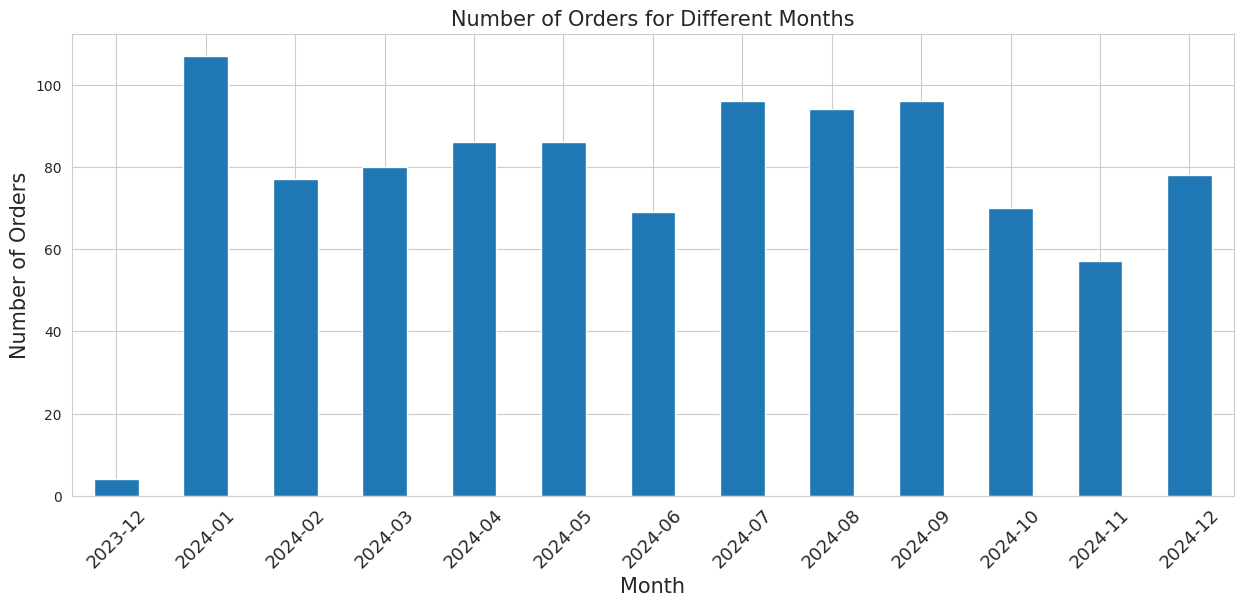

In [14]:
# Monthly Order Trends
merged['TransactionDate'] = pd.to_datetime(merged['TransactionDate'])
merged['MonthYear'] = merged['TransactionDate'].dt.to_period('M')
monthly_orders = merged.groupby('MonthYear')['TransactionID'].nunique()
plt.figure(figsize=(15, 6))
monthly_orders.plot(kind='bar', color=color[0])
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Orders', fontsize=15)
plt.title('Number of Orders for Different Months', fontsize=15)
plt.xticks(rotation=45, fontsize=13)
plt.show()

 # 2.	Regional Customer Distribution:

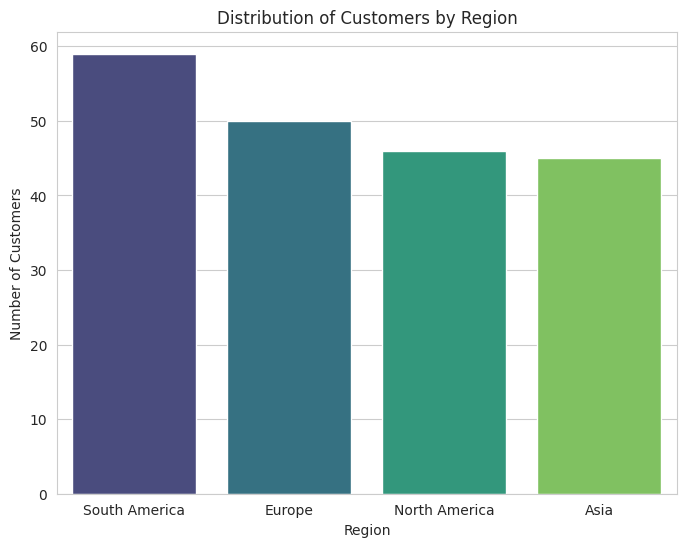

In [15]:
# Distribution of Customers by Region
plt.figure(figsize=(8, 6))
region_counts = customers["Region"].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title("Distribution of Customers by Region")
plt.ylabel("Number of Customers")
plt.xlabel("Region")
plt.show()

# 3.Top Product Categories by Sales:

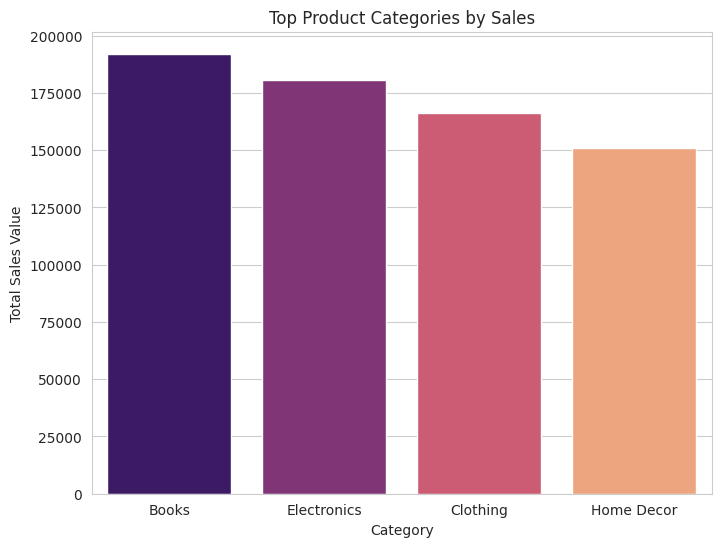

In [16]:
# Top Product Categories by Sales
plt.figure(figsize=(8, 6))
category_sales = merged.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values, palette="magma")
plt.title("Top Product Categories by Sales")
plt.ylabel("Total Sales Value")
plt.xlabel("Category")
plt.show()

#4.Sales Trends by Day of the Week

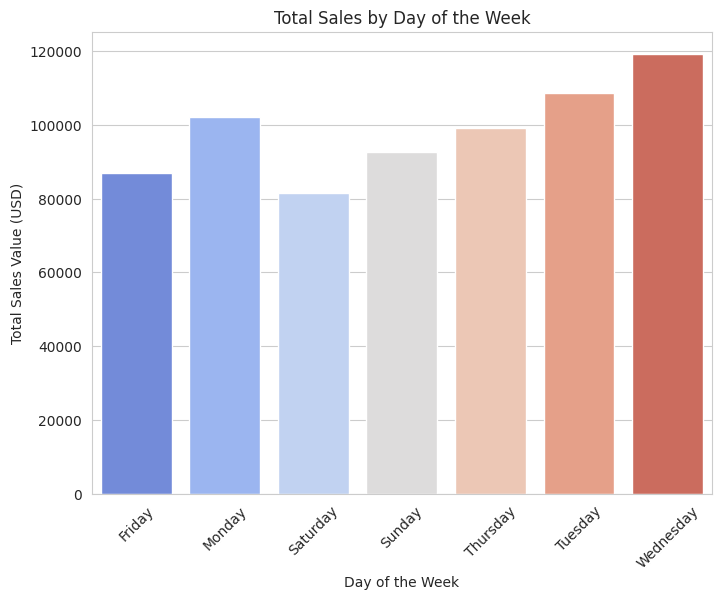

In [17]:
merged["TransactionDate"] = pd.to_datetime(merged["TransactionDate"])
merged["DayOfWeek"] = merged["TransactionDate"].dt.day_name()
sales_by_day = merged.groupby("DayOfWeek")["TotalValue"].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette="coolwarm")
plt.title("Total Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales Value (USD)")
plt.xticks(rotation=45)
plt.show()


#5.Monthly Sales Growth

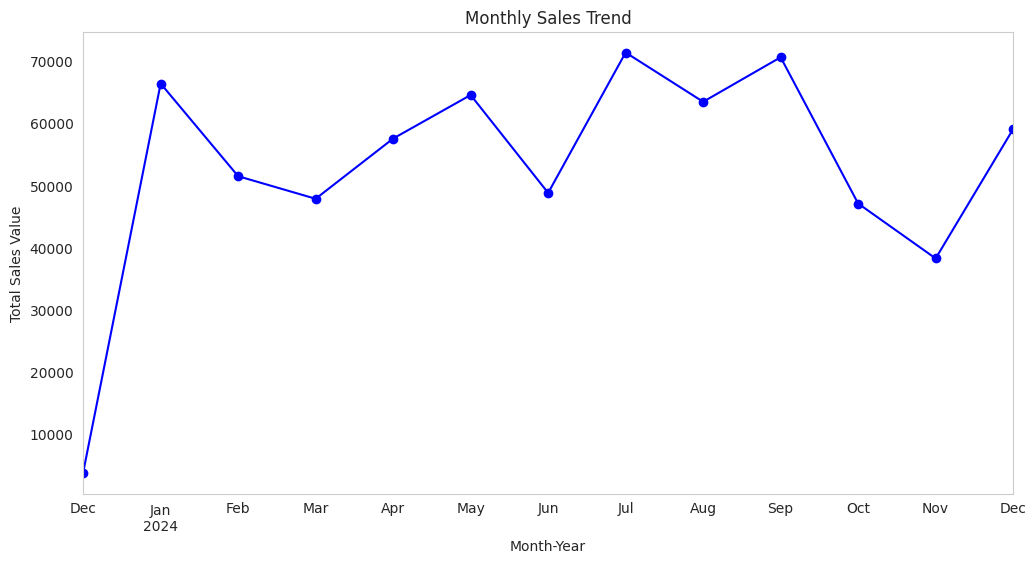

In [18]:
# Monthly Sales Trend
merged["TransactionDate"] = pd.to_datetime(merged["TransactionDate"])
merged["MonthYear"] = merged["TransactionDate"].dt.to_period("M")
monthly_sales = merged.groupby("MonthYear")["TotalValue"].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind="line", marker="o", color="b")
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales Value")
plt.xlabel("Month-Year")
plt.grid()
plt.show()

#6.	Average Spend per Transaction

Average Spend per Transaction: $690.00


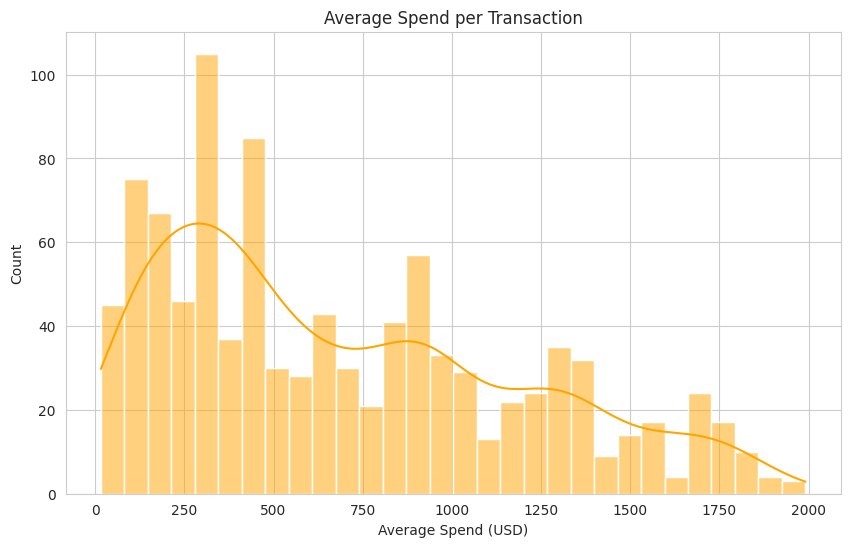

In [19]:
#Average Spend per Transaction This analysis can give insights into how much customers are typically spending per transaction.
avg_spend_per_transaction = merged.groupby("TransactionID")["TotalValue"].mean()
plt.figure(figsize=(10, 6))
sns.histplot(avg_spend_per_transaction, bins=30, kde=True, color="orange")
plt.title("Average Spend per Transaction")
plt.xlabel("Average Spend (USD)")

# Average spend per transaction
average_spend = transactions["TotalValue"].mean()
print(f"Average Spend per Transaction: ${average_spend:.2f}")

#7.Top Customers by Total Spend:

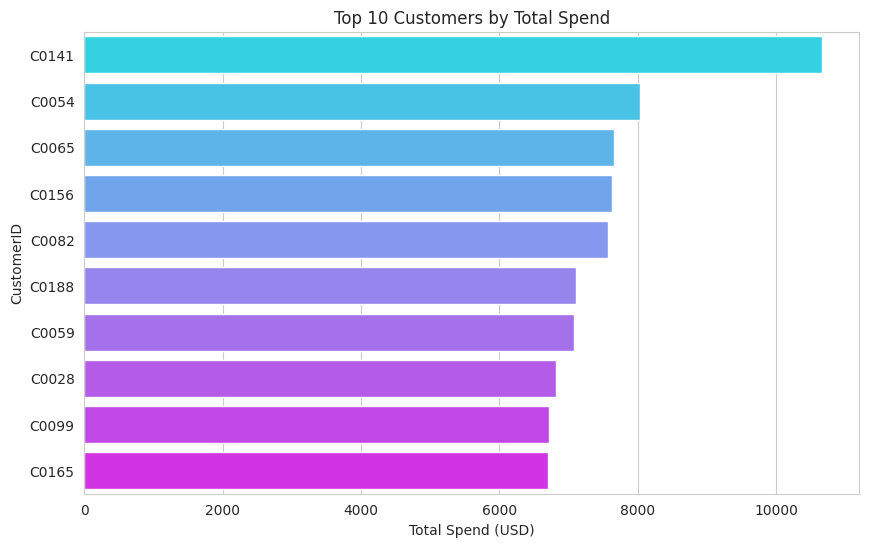

In [20]:
# Top Customers by Total Spend
plt.figure(figsize=(10, 6))
top_customers = merged.groupby("CustomerID")["TotalValue"].sum().nlargest(10)
sns.barplot(x=top_customers.values, y=top_customers.index, palette="cool")
plt.title("Top 10 Customers by Total Spend")
plt.xlabel("Total Spend (USD)")
plt.ylabel("CustomerID")
plt.show()

#8. Average Regional Spend Analysis:

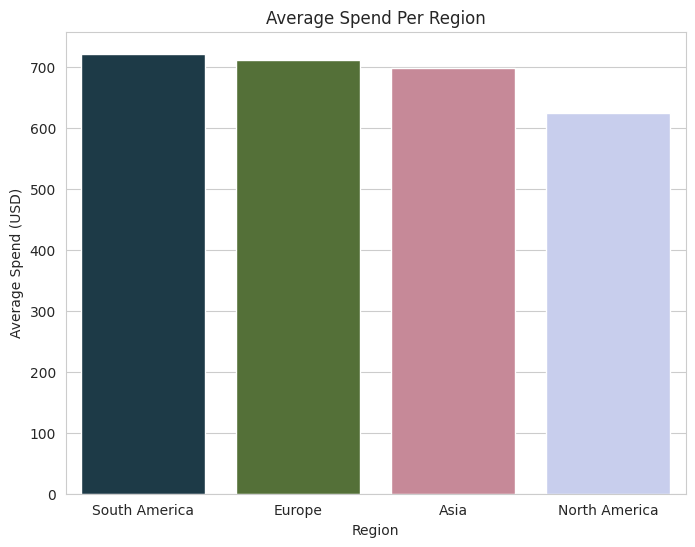

In [21]:
#Average Spend Per Region- Analyze how the spending differs by region.
plt.figure(figsize=(8, 6))
avg_spend_region = merged.groupby("Region")["TotalValue"].mean().sort_values(ascending=False)
sns.barplot(x=avg_spend_region.index, y=avg_spend_region.values, palette="cubehelix")
plt.title("Average Spend Per Region")
plt.ylabel("Average Spend (USD)")
plt.xlabel("Region")
plt.show()

#9.	Product Price Distribution:

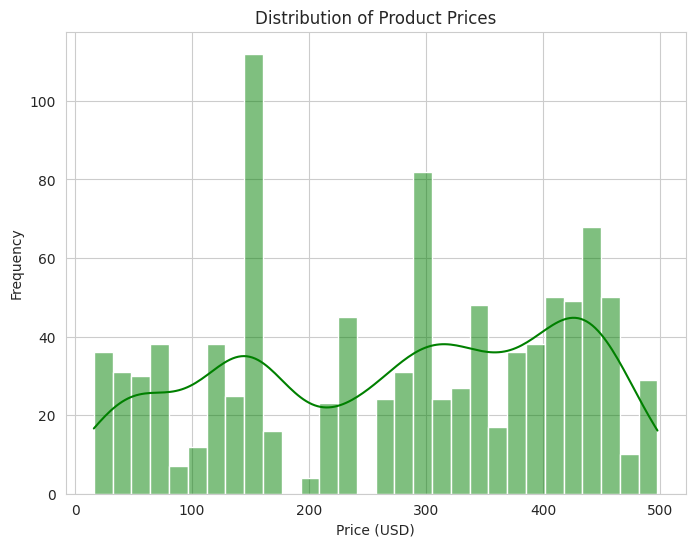

In [22]:
#Distribution of Product Prices - Visualize the distribution of product prices across all transactions.
plt.figure(figsize=(8, 6))
sns.histplot(merged["Price_x"], bins=30, kde=True, color="green")
plt.title("Distribution of Product Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

#10. Top Performing Products by Quantity:

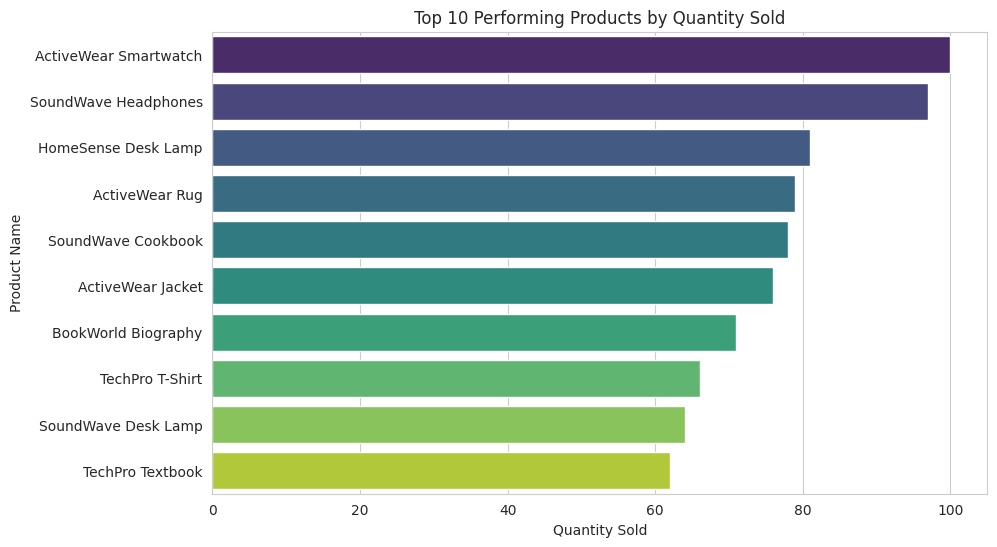

In [23]:
#Top Performing Products by Quantity Sold -Highlight the most purchased products by quantity.
plt.figure(figsize=(10, 6))
top_products = merged.groupby("ProductName")["Quantity"].sum().nlargest(10)
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Performing Products by Quantity Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()

#11.Customer Purchase Behavior (Quantity vs. Total Value)

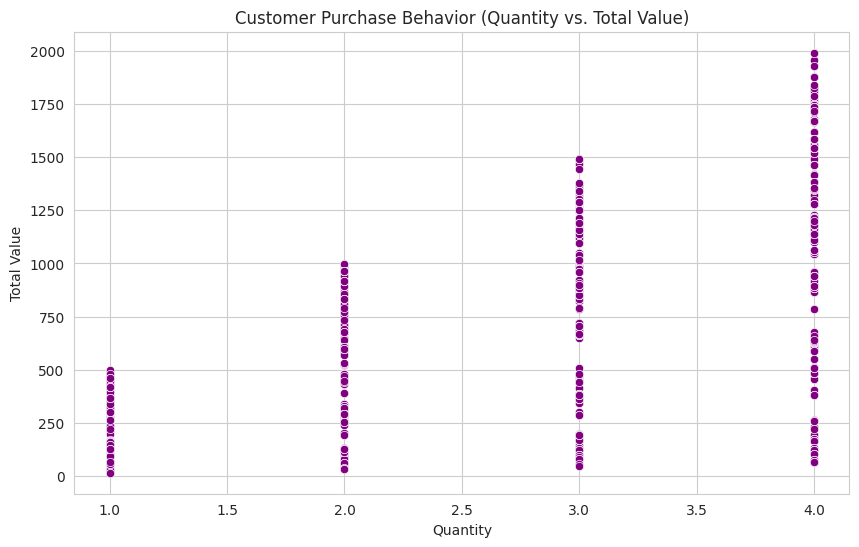

In [24]:
#Customer Purchase Behavior (Quantity vs. Total Value)This analysis will help to identify if there is a correlation between the quantity of items purchased and the total spend by customers.

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Quantity", y="TotalValue", data=merged, color="purple")
plt.title("Customer Purchase Behavior (Quantity vs. Total Value)")
plt.xlabel("Quantity")
plt.ylabel("Total Value")
plt.show()


#12. Customer Retention Over Time


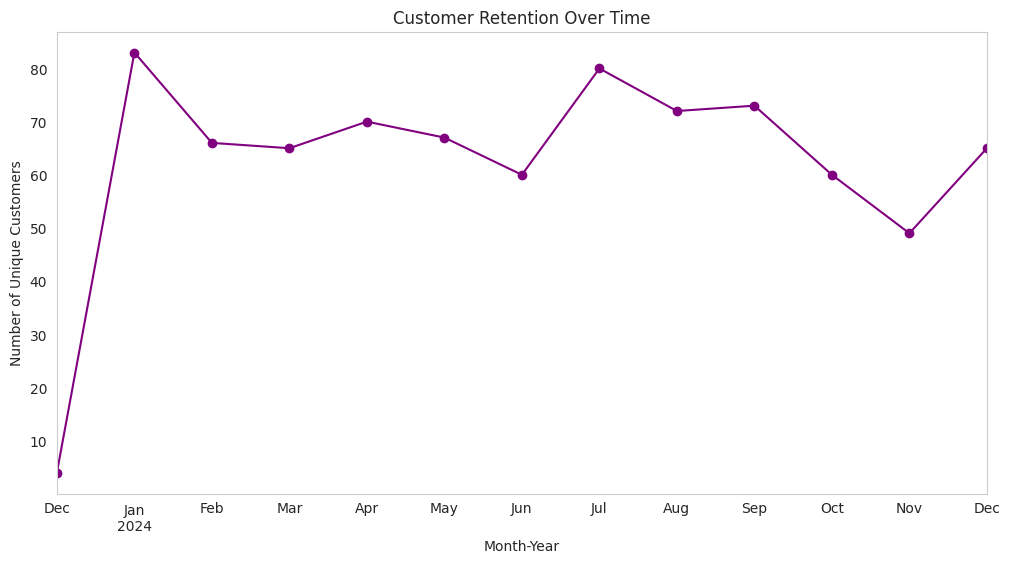

In [25]:
# Customer Retention Over Time -Track how many customers transact each month to understand retention patterns.
monthly_customers = merged.groupby("MonthYear")["CustomerID"].nunique()
plt.figure(figsize=(12, 6))
monthly_customers.plot(kind="line", marker="o", color="purple")
plt.title("Customer Retention Over Time")
plt.ylabel("Number of Unique Customers")
plt.xlabel("Month-Year")
plt.grid()
plt.show()

#13.Revenue Contribution by Product Category

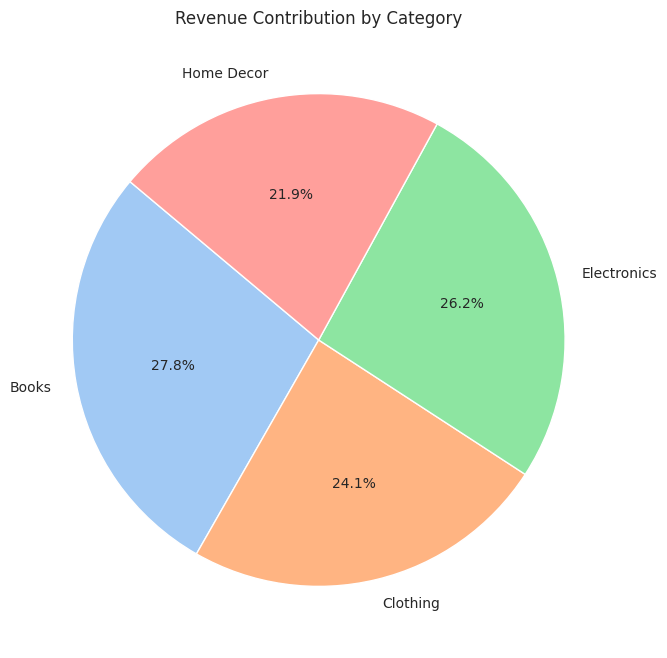

In [26]:
#Revenue Contribution by Category - Examine the percentage contribution of each category to the total revenue.
plt.figure(figsize=(8, 8))
category_contribution = merged.groupby("Category")["TotalValue"].sum()
category_contribution.plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("Revenue Contribution by Category")
plt.ylabel("")
plt.show()


#14.Sales Distribution by Transaction Date










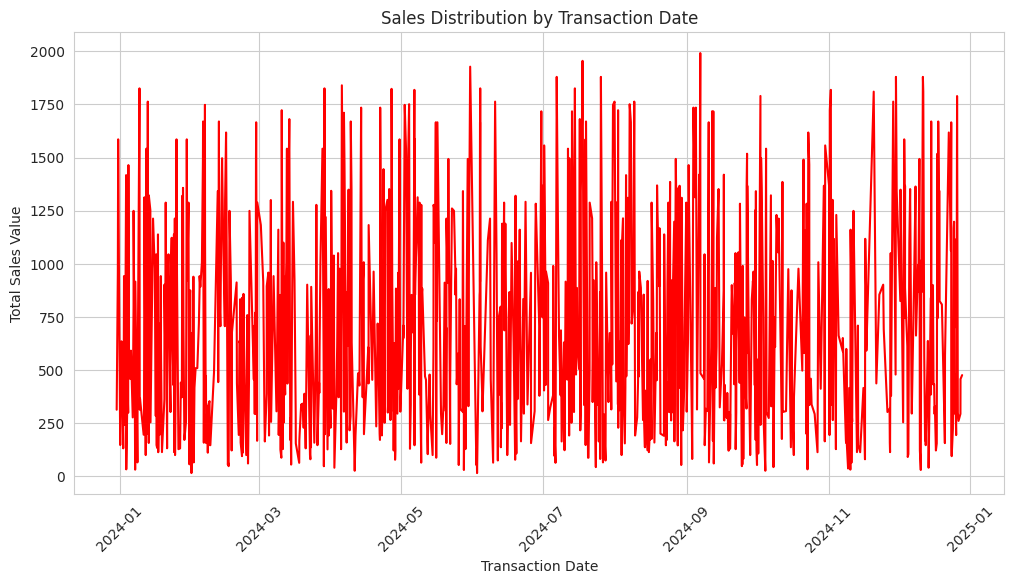

In [27]:
#Sales Distribution by Transaction Date-Analyzing the distribution of sales on specific dates or days can help in understanding customer purchasing behavior.
plt.figure(figsize=(12, 6))
sales_by_date = merged.groupby("TransactionDate")["TotalValue"].sum()
sns.lineplot(x=sales_by_date.index, y=sales_by_date.values, color="r")
plt.title("Sales Distribution by Transaction Date")
plt.ylabel("Total Sales Value")
plt.xlabel("Transaction Date")
plt.xticks(rotation=45)
plt.show()


#15.Transaction Frequency per Customer

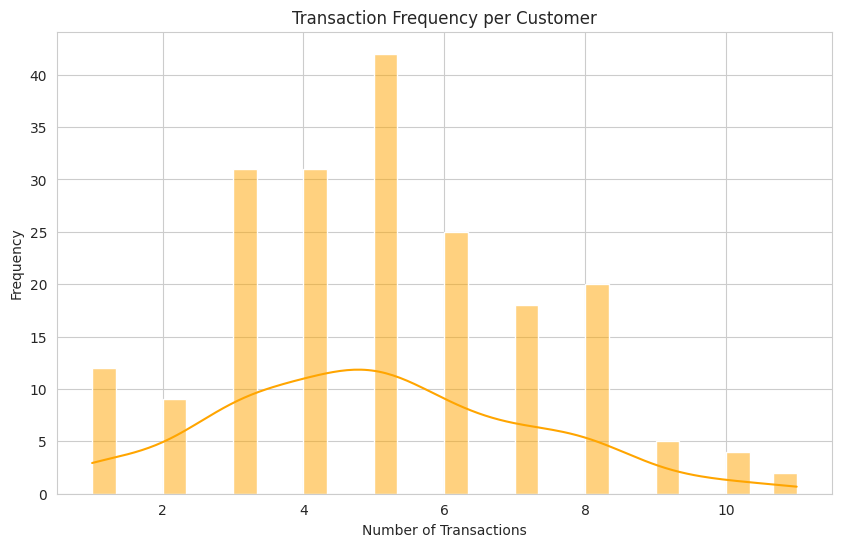

In [28]:
transaction_frequency = merged.groupby("CustomerID")["TransactionID"].count()
plt.figure(figsize=(10, 6))
sns.histplot(transaction_frequency, bins=30, kde=True, color="orange")
plt.title("Transaction Frequency per Customer")
plt.xlabel("Number of Transactions")
plt.ylabel("Frequency")
plt.show()

#16.Correlation of Features

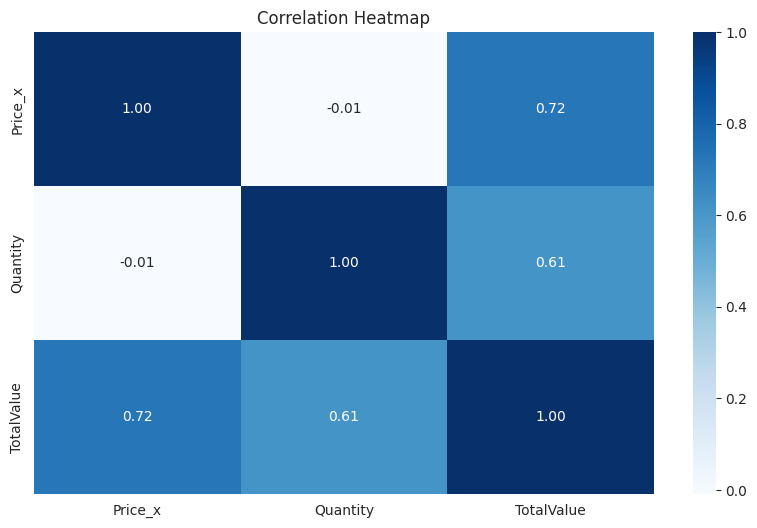

In [29]:
# 10. Correlation Heatmap (Numerical Features)
plt.figure(figsize=(10, 6))
corr = merged[["Price_x", "Quantity", "TotalValue"]].corr()
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()